In [3]:
import pandas 
import os
import duckdb

In [4]:
os.listdir()

['.git',
 'BEON Data Analyst Exercise.pdf',
 'nyc_airlines.csv',
 'nyc_airports.csv',
 'nyc_flights_fixed.csv',
 'nyc_planes.csv',
 'Sales_Product_Combined.csv',
 'solution.ipynb']

In [5]:
airlines = pandas.read_csv('nyc_airlines.csv')
airports = pandas.read_csv('nyc_airports.csv')
flights = pandas.read_csv('nyc_flights_fixed.csv')
planes = pandas.read_csv('nyc_planes.csv')

In [6]:
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [7]:
flights.query("origin == 'EWR'")[['origin','dest']].drop_duplicates().shape

(82, 2)

In [8]:
list(flights.query("origin == 'EWR'")[['origin','dest']].drop_duplicates()['dest'])

['IAH',
 'ORD',
 'FLL',
 'SFO',
 'LAS',
 'PBI',
 'MIA',
 'ATL',
 'PHX',
 'MSP',
 'LAX',
 'IAD',
 'CLT',
 'SNA',
 'TPA',
 'RSW',
 'SEA',
 'DEN',
 'MCO',
 'BOS',
 'JAX',
 'CHS',
 'MEM',
 'DFW',
 'MYR',
 'JAC',
 'RDU',
 'DTW',
 'SAN',
 'MDW',
 'CLE',
 'EGE',
 'DCA',
 'AVL',
 'STL',
 'BUF',
 'IND',
 'MKE',
 'PWM',
 'SAV',
 'SYR',
 'CMH',
 'ROC',
 'BWI',
 'BTV',
 'DAY',
 'HOU',
 'ALB',
 'BDL',
 'SLC',
 'PIT',
 'HNL',
 'MHT',
 'MSN',
 'GSO',
 'CVG',
 'AUS',
 'RIC',
 'GSP',
 'GRR',
 'MCI',
 'BNA',
 'SAT',
 'SDF',
 'PDX',
 'OMA',
 'TUL',
 'TYS',
 'OKC',
 'PVD',
 'DSM',
 'ORF',
 'XNA',
 'MSY',
 'CAE',
 'PHL',
 'HDN',
 'BZN',
 'MTJ',
 'SBN',
 'TVC',
 'ANC']

In [9]:
list(flights.query("origin == 'EWR'")[['origin','dest']].drop_duplicates()['dest'])

['IAH',
 'ORD',
 'FLL',
 'SFO',
 'LAS',
 'PBI',
 'MIA',
 'ATL',
 'PHX',
 'MSP',
 'LAX',
 'IAD',
 'CLT',
 'SNA',
 'TPA',
 'RSW',
 'SEA',
 'DEN',
 'MCO',
 'BOS',
 'JAX',
 'CHS',
 'MEM',
 'DFW',
 'MYR',
 'JAC',
 'RDU',
 'DTW',
 'SAN',
 'MDW',
 'CLE',
 'EGE',
 'DCA',
 'AVL',
 'STL',
 'BUF',
 'IND',
 'MKE',
 'PWM',
 'SAV',
 'SYR',
 'CMH',
 'ROC',
 'BWI',
 'BTV',
 'DAY',
 'HOU',
 'ALB',
 'BDL',
 'SLC',
 'PIT',
 'HNL',
 'MHT',
 'MSN',
 'GSO',
 'CVG',
 'AUS',
 'RIC',
 'GSP',
 'GRR',
 'MCI',
 'BNA',
 'SAT',
 'SDF',
 'PDX',
 'OMA',
 'TUL',
 'TYS',
 'OKC',
 'PVD',
 'DSM',
 'ORF',
 'XNA',
 'MSY',
 'CAE',
 'PHL',
 'HDN',
 'BZN',
 'MTJ',
 'SBN',
 'TVC',
 'ANC']

In [10]:
conn = duckdb.connect()

<Axes: xlabel='date', ylabel='distinct_dest'>

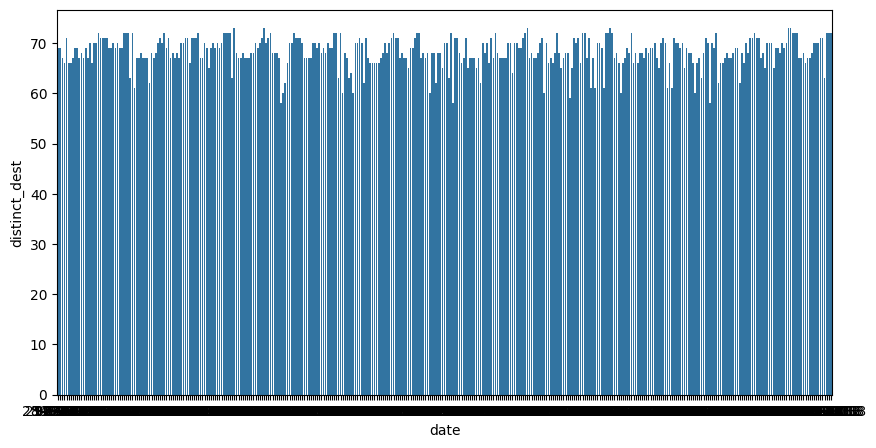

In [11]:
df1 = conn.execute(
""" select year, month, day, 
concat( day, '-', month, '-', year) as date,
   count( distinct dest) as distinct_dest
    from flights 
    where origin = 'EWR' 
    group by year, month, day
""").df()

# barplot 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=df1, x='date', y='distinct_dest')

In [12]:
conn.execute(
""" with base as (select year, month, year *100 + month as date_month,
    count(*) as flights
    from flights 
    where origin = 'EWR' 
    group by year, month, day)

    select date_month, sum(flights) as flights
    from base
    group by date_month
    order by 2 desc
    limit 1
""").df()



,date_month,flights
0,201305,9931.0


In [13]:
conn.execute(
""" with base as (select year, month, year *100 + month as date_month,
    count(*) as flights
    from flights 
    where origin = 'EWR' 
    group by year, month, day)

    select date_month, sum(flights) as flights
    from base
    group by date_month
    order by 2 desc
    limit 1
""").df()

,date_month,flights
0,201305,9931.0


C:\Users\Guilh\AppData\Local\Temp\ipykernel_17068\1093841101.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '20130100'),
 Text(1, 0, '20130200'),
 Text(2, 0, '20130300'),
 Text(3, 0, '20130400'),
 Text(4, 0, '20130500'),
 Text(5, 0, '20130600'),
 Text(6, 0, '20130700'),
 Text(7, 0, '20130800'),
 Text(8, 0, '20130900'),
 Text(9, 0, '20131000'),
 Text(10, 0, '20131100'),
 Text(11, 0, '20131200')]

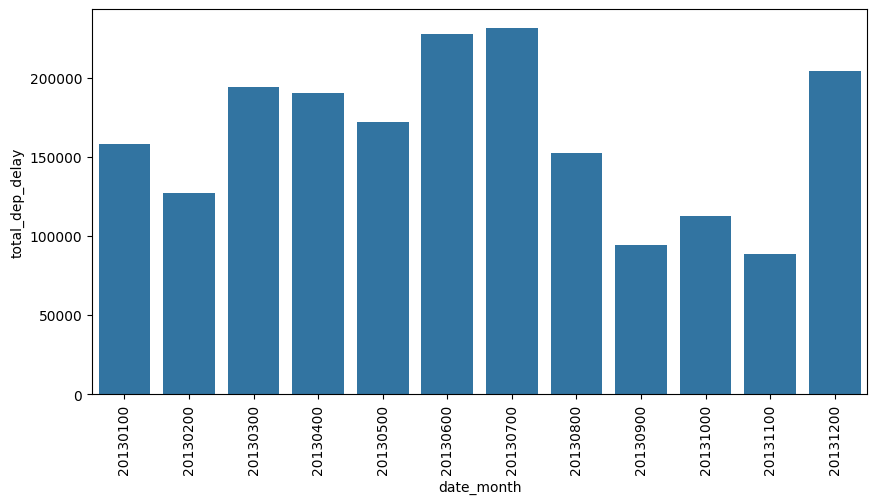

In [14]:
df2 = conn.execute(
""" with base as (select 
    month, year * 10000 + 100 * month as date_month,
    sum( case when dep_delay > 0 then dep_delay else 0 end) as total_dep_delay
    from flights 
    where origin = 'EWR' 
    group by 1,2
    order by 1 desc)

    select date_month, total_dep_delay, sum( total_dep_delay) over (order by date_month) as cum_dep_delay
    from base
""").df()



# create an matplotlib object
fig, ax = plt.subplots(figsize=(10, 5))
# add a barchart to the matplotlib object
sns.barplot(data=df2, x='date_month', y='total_dep_delay', ax=ax)
# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [15]:
df3 = conn.execute(
""" with base as (select *
    from flights 
    where origin = 'EWR')

    select *
    from base
""").df()

df3

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
1,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z
2,5,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01T11:00:00Z
3,11,2013,1,1,558,600,-2,923,937,-14,UA,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01T11:00:00Z
4,13,2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113380,335723,2013,9,30,2142,2129,13,2250,2239,11,EV,4509,N12957,EWR,PWM,47,284,21,29,2013-10-01T01:00:00Z
113381,335726,2013,9,30,2149,2156,-7,2245,2308,-23,UA,523,N813UA,EWR,BOS,37,200,21,56,2013-10-01T01:00:00Z
113382,335727,2013,9,30,2150,2159,-9,2250,2306,-16,EV,3842,N10575,EWR,MHT,39,209,21,59,2013-10-01T01:00:00Z
113383,335731,2013,9,30,2211,2059,72,2339,2242,57,EV,4672,N12145,EWR,STL,120,872,20,59,2013-10-01T00:00:00Z


In [16]:
conn.execute(
""" with base as (select f.*, a.name as airline_name
    from flights f
    inner join airlines a
    on a.carrier = f.carrier
    where f.origin = 'EWR')

    select airline_name, count(*) as flights
    from base
    group by airline_name
    order by 2 desc
""").df()

,airline_name,flights
0,United Air Lines Inc.,43983
1,ExpressJet Airlines Inc.,43939
2,Southwest Airlines Co.,6165
3,JetBlue Airways,6086
4,US Airways Inc.,4297
5,Delta Air Lines Inc.,4237
6,Virgin America,1566
7,Endeavor Air Inc.,1200
8,American Airlines Inc.,1145
9,Alaska Airlines Inc.,714


In [17]:
conn.execute(
""" with base as (select f.*, a.name as airline_name
    from flights f
    inner join airlines a
    on a.carrier = f.carrier
    where f.origin = 'EWR'),

    ranking as (
    select airline_name, count(*) as flights
    from base
    group by airline_name
    order by 2 desc)

    select airline_name, flights, round(100 * flights/ sum(flights) over () ,2) as total_flights
    from ranking
""").df()

,airline_name,flights,total_flights
0,United Air Lines Inc.,43983,38.79
1,ExpressJet Airlines Inc.,43939,38.75
2,Southwest Airlines Co.,6165,5.44
3,JetBlue Airways,6086,5.37
4,US Airways Inc.,4297,3.79
5,Delta Air Lines Inc.,4237,3.74
6,Virgin America,1566,1.38
7,Endeavor Air Inc.,1200,1.06
8,American Airlines Inc.,1145,1.01
9,Alaska Airlines Inc.,714,0.63
